In [1]:
import os
import pandas
import numpy as np
import torch
import matplotlib.pyplot as plt
import hcpdatautils as hcp
import isingmodel

In [2]:
int_type = torch.int
float_type = torch.float
device = torch.device('cuda')

In [3]:
data_dir = 'E:\\Ising_model_results_daai'
model_dir = 'E:\\Ising_model_results_daai'

In [4]:
# fim_file = os.path.join(model_dir, 'fim_file_1_of_20_group_training_threshold_median_parallel_10000_updates_1000_sim_length_12000_learning_rate_0.01_beta_0.0122000000000000007743805596760466869.pt')
# fim_part = torch.load(fim_file)
# print( fim_part.size() )

In [5]:
num_parts = 20
num_cols = 64980
rows_per_part = 3249
fim = np.zeros( (3, num_cols, num_cols), dtype=np.uint8 )

In [6]:
num_parts = 20
for part_index in range(num_parts):
    part_number = part_index+1
    start_row = part_index * rows_per_part
    end_row = start_row + rows_per_part
    fim_file = os.path.join(model_dir, f'fim_file_{part_number}_of_{num_parts}_group_training_threshold_median_parallel_10000_updates_1000_sim_length_12000_learning_rate_0.01_beta_0.0122000000000000007743805596760466869.pt')
    fim[:,start_row:end_row,:] = torch.clamp(  255*torch.load(fim_file), min=0, max=255  ).round().to(torch.uint8).unsqueeze(dim=0).repeat( (3,1,1) ).detach().cpu().numpy()

MemoryError: Unable to allocate 11.8 GiB for an array with shape (3, 64980, 64980) and data type bool

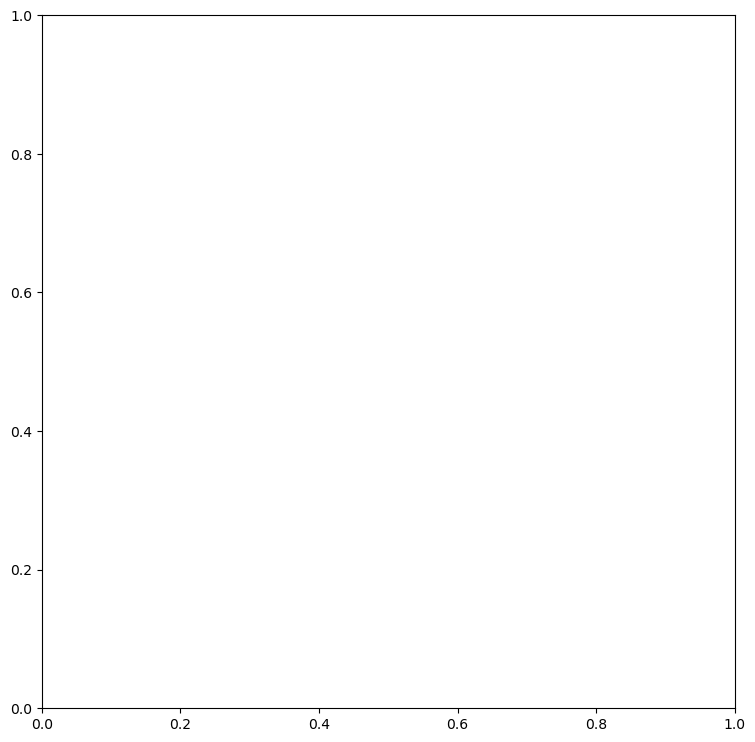

In [7]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(9, 9))
axs.imshow(fim)

In [8]:
print( fim.min(), fim.max() )

-0.049021899700164795 0.9999998807907104
